In [ ]:
from google.colab import files

uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test (2).csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


Строчка выше была добавлена так как данная работа была выполнена в Google Colab

In [ ]:
import pandas as pd
import tensorflow as tf
trainData = pd.read_csv('fashion-mnist_train.csv')
testData = pd.read_csv('fashion-mnist_test.csv')

testLabel = testData['label'].to_numpy()
testImg = testData.iloc[:,1:].to_numpy()
testLabel = tf.keras.utils.to_categorical(testLabel)

trainLabel = trainData['label'].to_numpy()
trainImg = trainData.iloc[:,1:].to_numpy()
trainLabel = tf.keras.utils.to_categorical(trainLabel)

testImg /= 250
trainImg = trainImg/250


FileNotFoundError: ignored

Для начала построим модель , в которой будет использоваться логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLogReg = LogisticRegression()
modelLogReg.fit(trainImg[:100],trainData['label'].to_numpy()[:100])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Теперь посмотрим на точность наших предсказаний с помощью метода score

In [ ]:
modelLogReg.score(testImg,testData['label'].to_numpy())

0.7147

Построим полносвязную модель 2мя скрытыми слоями между которыми будет находиться слой Dropuot

In [ ]:


model = tf.keras.models.Sequential(name='NorsOlFasol')
model.add(tf.keras.layers.Dense(512,activation='relu',input_shape =(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adadelta(),
    metrics = ['accuracy']
)

Обучим приведенную выше модель на тренировочных данных и вычислим точность на тестовых данных. Обучение будет происходить в 10 эпохах.


In [ ]:
model.fit(trainImg,trainLabel,epochs=10)
loss, accuracy  = model.evaluate(testImg,testLabel)
  

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 23.4090 - accuracy: 0.5191
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 17.9717 - accuracy: 0.5933
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 15.1578 - accuracy: 0.6355
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 13.0642 - accuracy: 0.6595
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 11.5021 - accuracy: 0.6794
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.4451 - accuracy: 0.6931
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4254 - accuracy: 0.7053
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.7492 - accuracy: 0.7125
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 8.0696 - accuracy: 0.7188
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 4

Как мы можем видеть при проверке обученной модели на тестовых данных получается точность получается 0.7914

Далее построим свёрточную нейронную сеть

In [ ]:
xtrain = trainImg.reshape(60000,28,28,1)
xtest = testImg.reshape(10000,28,28,1)

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Convolution2D( filters=32, kernel_size= (3,3), activation='relu',input_shape =(28,28,1,) ))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Convolution2D( filters=64, kernel_size= (3,3), activation='tanh'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))


model2.compile(
    loss = 'mean_squared_error',
    optimizer = tf.keras.optimizers.Adadelta(),
    metrics = ['accuracy'])

Теперь обучим нашу новую модель на тренировочных данных и рассчитаем точность.

In [ ]:
model2.fit(xtrain,trainLabel,epochs=10)
loss, accuracy  = model2.evaluate(xtest,testLabel)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.2596
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.4656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.5494
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.6348
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.6918
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.7183
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.7333
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.7429
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.7510
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0350 

Получили точность 0.7660

Теперь модифицируем нашу нейронную сеть , представленную выше , добавив несколько полносвязных скрытых слоёв и изменив функцию потерь

In [ ]:

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Convolution2D( filters=32, kernel_size= (3,3), activation='relu',input_shape =(28,28,1,) ))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Convolution2D( filters=64, kernel_size= (3,3), activation='tanh'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dense(128,activation='selu'))
model3.add(tf.keras.layers.Dense(128,activation='relu'))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64,activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))


model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adadelta(),
    metrics = ['accuracy'])

In [ ]:
model3.fit(xtrain,trainLabel,epochs=10)
loss, accuracy  = model3.evaluate(xtest,testLabel)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9118 - accuracy: 0.4164
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2825 - accuracy: 0.6556
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9868 - accuracy: 0.7054
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8442 - accuracy: 0.7280
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7648 - accuracy: 0.7425
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7136 - accuracy: 0.7539
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6767 - accuracy: 0.7629
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6486 - accuracy: 0.7703
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6259 - accuracy: 0.7764
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5940 

Тесты показали что точность на тестовых данных улучшилась до 0.7878

Далее применим batch_Normalization к добавленным полносвязным слоям предыдущей модели 


In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Convolution2D( filters=32, kernel_size= (3,3), activation='relu',input_shape =(28,28,1,) ))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Convolution2D( filters=64, kernel_size= (3,3), activation='tanh'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Dense(128,activation='selu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(128,activation='relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(64,activation='relu'))
model4.add(tf.keras.layers.Dense(10,activation='softmax'))


model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adadelta(),
    metrics = ['accuracy'])

In [ ]:
model4.fit(xtrain,trainLabel,epochs=10)
loss, accuracy  = model4.evaluate(xtest,testLabel)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7316 - accuracy: 0.4127
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0459 - accuracy: 0.6491
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8154 - accuracy: 0.7248
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7103 - accuracy: 0.7545
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6491 - accuracy: 0.7717
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6076 - accuracy: 0.7863
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5776 - accuracy: 0.7950
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5535 - accuracy: 0.8030
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5348 - accuracy: 0.8086
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5176 

Применение Batch_Normalization существенно улучшило качество предсказаний наших моделей до 0.8154.
Далее хотелось бы привести графики , на которых будет показано, какая из 4х приведенных выше моделей, основанных на нейронных сетях обучается быстрее.

In [ ]:
SimpleModelAcc = [0.5191, 0.5933, 0.6355, 0.6595, 0.6794,0.6931,0.7053, 0.7125,0.7188, 0.7251, 0.7914]
SimpleConv = [ 0.2596,0.4656,0.5494,0.6348,0.6918,0.7183,0.7333,0.7429,0.7510,0.7578,0.7660]
ConvModified = [ 0.4164,0.6556,0.7054,0.7280,0.7425,0.7539,0.7629,0.7703,0.7764,0.7822,0.7878]
ConvBatch = [0.4127,0.6491,0.7248,0.7545,0.7717,0.7863,0.7950,0.8030,0.8086,0.8145,0.8154]

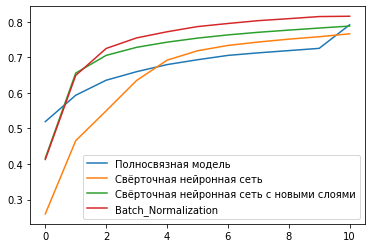

In [ ]:
import matplotlib.pyplot as plt
#plt.legend(["Полносвязная модель","Свёрточная нейронная сеть","Свёрточная нейронная сеть с новыми слоями", "Batch_Normalization"])
pl = plt.plot(SimpleModelAcc)
plt.plot(SimpleConv)
plt.plot(ConvModified)
plt.plot(ConvBatch)
plt.legend(["Полносвязная модель","Свёрточная нейронная сеть","Свёрточная нейронная сеть с новыми слоями", "Batch_Normalization"])
